In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
usage_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/usage_data.csv')
usage_data.head()

,Date,Username,Feature,Sessions,Time spent,Average time spent
0,2017-06-01,kwalter,Reporting,14,23.0,1.642857
1,2017-06-01,kcarr,Roadmap,17,55.0,3.235294
2,2017-06-01,cstuart,Automation,13,2.0,0.153846
3,2017-06-01,mkelley,Task Creation,14,18.0,1.285714
4,2017-06-02,edillon,Task Creation,17,13.0,0.764706


In [ ]:
usage_data.shape

(10575, 6)

In [ ]:
usage_data.describe()

,Sessions,Time spent,Average time spent
count,10575.000000,10575.000000,10575.000000
mean,14.410213,23.683625,1.875051
std,3.252482,13.598790,1.707132
min,3.000000,0.000000,0.000000
25%,13.000000,15.000000,1.000000
50%,15.000000,21.000000,1.466667
75%,16.000000,30.000000,2.187500
max,22.000000,60.000000,20.000000


In [ ]:
usage_data['Feature'].nunique()

6

In [ ]:
usage_data['Username'].nunique()

100

In [ ]:
users_time_spent=usage_data.groupby('Username')['Time spent'].sum().sort_values(ascending=False).head()
users_time_spent

Username
bedwards      3043.000000
bwise         3039.000000
rcalhoun      3034.333333
alara         2978.000000
jnicholson    2973.666667
Name: Time spent, dtype: float64

In [ ]:
usage_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10575 entries, 0 to 10574
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                10575 non-null  object 
 1   Username            10575 non-null  object 
 2   Feature             10575 non-null  object 
 3   Sessions            10575 non-null  int64  
 4   Time spent          10575 non-null  float64
 5   Average time spent  10575 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 495.8+ KB


In [ ]:
usage_data['Date'] = pd.to_datetime(usage_data['Date'])

In [ ]:
usage_data.isna().sum()

Date                  0
Username              0
Feature               0
Sessions              0
Time spent            0
Average time spent    0
dtype: int64

In [ ]:
duplicated_rows=usage_data[usage_data.duplicated()]
duplicated_rows

,Date,Username,Feature,Sessions,Time spent,Average time spent




---



---



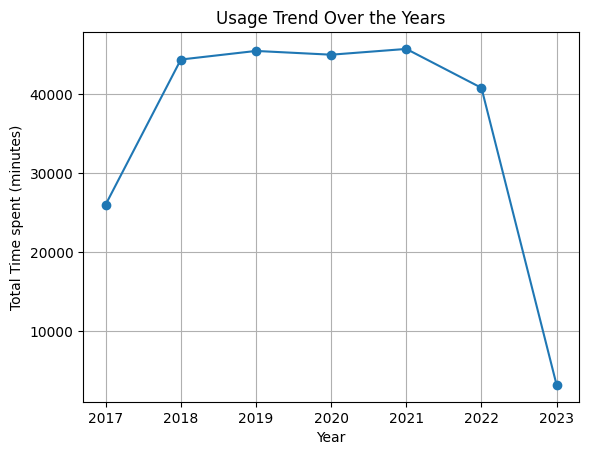

In [ ]:
# Extract year from Date column
usage_data['Year'] = usage_data['Date'].dt.year

# Aggregate the data by year
yearly_usage = usage_data.groupby('Year')['Time spent'].sum()

# Plot the trend
plt.plot(yearly_usage.index, yearly_usage.values, marker='o')
plt.title('Usage Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Time spent (minutes)')
plt.grid(True)
plt.show()

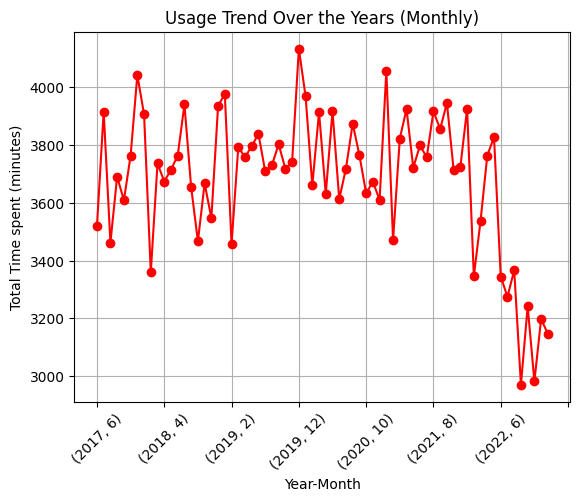

In [ ]:
# Convert Date column to datetime
usage_data['Date'] = pd.to_datetime(usage_data['Date'])

# Extract year and month from Date column
usage_data['Year'] = usage_data['Date'].dt.year
usage_data['Month'] = usage_data['Date'].dt.month

# Aggregate the data by year and month
monthly_usage = usage_data.groupby(['Year', 'Month'])['Time spent'].sum()

# Plot the trend
monthly_usage.plot(marker='o', color='r')
plt.title('Usage Trend Over the Years (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Total Time spent (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Extract year from Date column
usage_data['Year'] = usage_data['Date'].dt.year

# Filter data for January 2023
january_2023_data = usage_data[(usage_data['Year'] == 2023) & (usage_data['Date'].dt.month == 1)]

# Group by Username and calculate total time spent in January 2023
january_2023_usage = january_2023_data.groupby('Username')['Time spent'].sum()

# Calculate average usage for each customer in previous years
previous_years_avg = usage_data[usage_data['Year'] < 2023].groupby('Username')['Time spent'].mean()

# Align indexes to perform comparison
january_2023_usage = january_2023_usage.reindex(previous_years_avg.index, fill_value=None)

# Identify customers with significantly lower usage in January 2023 compared to previous years
significant_drop_customers = previous_years_avg[previous_years_avg * 0.5 > january_2023_usage]

print("Customers with significant drop in usage in January 2023:")
print(significant_drop_customers.index)

Customers with significant drop in usage in January 2023:
Index(['greilly', 'ipierce', 'kvilla', 'mforbes', 'mgonzalez', 'mstephens',
       'oherman', 'twright'],
      dtype='object', name='Username')


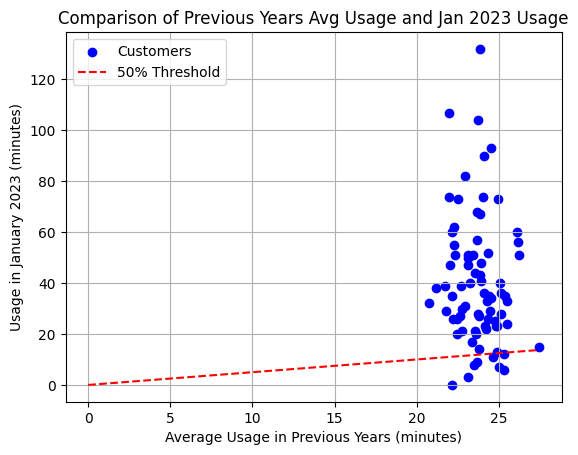

In [ ]:
# Extract year from Date column
usage_data['Year'] = usage_data['Date'].dt.year

# Filter data for January 2023
january_2023_data = usage_data[(usage_data['Year'] == 2023) & (usage_data['Date'].dt.month == 1)]

# Group by Username and calculate total time spent in January 2023
january_2023_usage = january_2023_data.groupby('Username')['Time spent'].sum()

# Calculate average usage for each customer in previous years
previous_years_avg = usage_data[usage_data['Year'] < 2023].groupby('Username')['Time spent'].mean()

# Align indexes to perform comparison
january_2023_usage = january_2023_usage.reindex(previous_years_avg.index, fill_value=None)

# Identify customers with significantly lower usage in January 2023 compared to previous years
significant_drop_customers = previous_years_avg[previous_years_avg * 0.5 > january_2023_usage].sort_values(ascending=False)

# Plot comparison
plt.scatter(previous_years_avg.values, january_2023_usage.values, color='blue', label='Customers')
plt.plot([0, max(previous_years_avg)], [0, max(previous_years_avg) * 0.5], color='red', linestyle='--', label='50% Threshold')
plt.title('Comparison of Previous Years Avg Usage and Jan 2023 Usage')
plt.xlabel('Average Usage in Previous Years (minutes)')
plt.ylabel('Usage in January 2023 (minutes)')
plt.legend()
plt.grid(True)
plt.show()

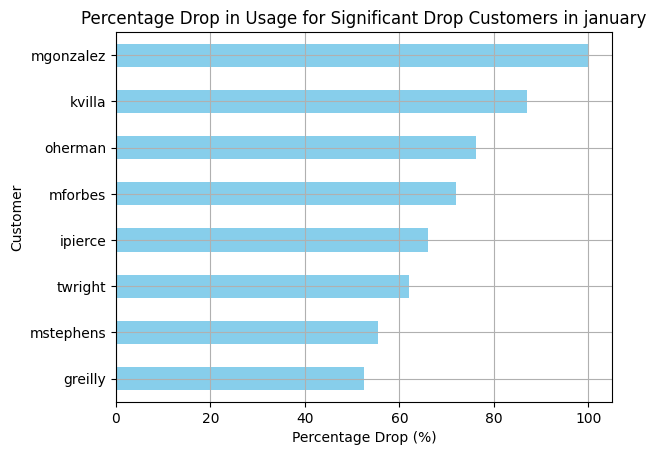

In [ ]:
# Calculate percentage drop
percentage_drop = ((previous_years_avg - january_2023_usage) / previous_years_avg) * 100

# Filter only significant drop customers
significant_drop_customers = previous_years_avg[previous_years_avg * 0.5 > january_2023_usage]

# Filter percentage drop for significant drop customers
percentage_drop = percentage_drop[percentage_drop.index.isin(significant_drop_customers.index)]

# Sort percentage drop in descending order
percentage_drop_sorted = percentage_drop.sort_values()

# Plot the percentage drop
percentage_drop_sorted.plot(kind='barh', color='skyblue')
plt.title('Percentage Drop in Usage for Significant Drop Customers in january')
plt.xlabel('Percentage Drop (%)')
plt.ylabel('Customer')
plt.grid(True)
plt.show()

In [ ]:
print("Percentage Drop in Usage for Significant Drop Customers:")
percentage_drop.sort_values(ascending=False)

Percentage Drop in Usage for Significant Drop Customers:


Username
mgonzalez    100.000000
kvilla        87.034660
oherman       76.274945
mforbes       72.022382
ipierce       65.963855
twright       61.983863
mstephens     55.405405
greilly       52.619704
Name: Time spent, dtype: float64

In [ ]:
# Filter only the customers listed
selected_customers = ['mgonzalez', 'kvilla', 'oherman', 'mforbes', 'ipierce', 'twright', 'mstephens', 'greilly']
selected_customers_data = january_2023_data[january_2023_data['Username'].isin(selected_customers)]

# Calculate total usage for January 2023
january_2023_usage = selected_customers_data.groupby('Username')['Time spent'].sum()

# Calculate average usage for each customer in previous years
previous_years_avg = usage_data[usage_data['Year'] < 2023].groupby('Username')['Time spent'].mean()

# Filter previous years average for selected customers
previous_years_avg = previous_years_avg[previous_years_avg.index.isin(selected_customers)]

# Combine previous years average and January 2023 usage into a DataFrame
usage_comparison = pd.DataFrame({'Previous Years Avg': previous_years_avg, 'Jan 2023 Usage': january_2023_usage})

print("Average Usage Comparison for Selected Customers:")
display(usage_comparison)

Average Usage Comparison for Selected Customers:


,Previous Years Avg,Jan 2023 Usage
Username,,
greilly,25.326984,12.0
ipierce,23.504425,8.0
kvilla,23.138614,3.0
mforbes,25.020000,7.0
mgonzalez,22.125000,0.0
mstephens,24.666667,11.0
oherman,25.289720,6.0
twright,23.674157,9.0


**mgonzalez usage pattern over months (100% decline)**

<Figure size 1200x800 with 0 Axes>

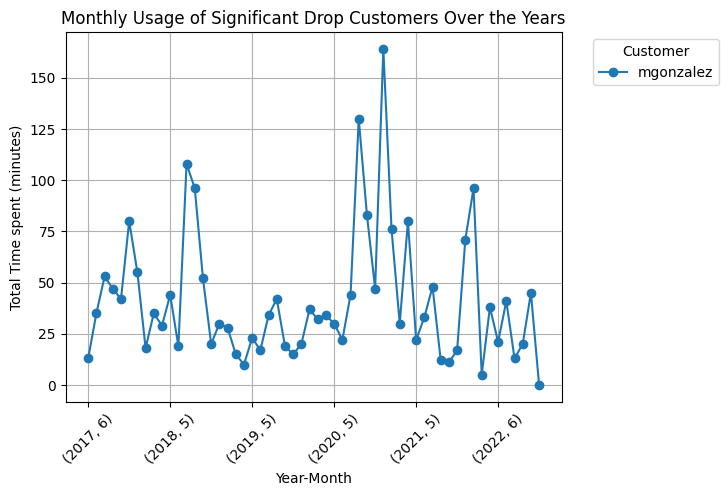

In [ ]:
# Extract year and month from Date column
usage_data['Year'] = usage_data['Date'].dt.year
usage_data['Month'] = usage_data['Date'].dt.month

# List of customers with significant drop in usage
significant_drop_customers = ['mgonzalez']

# Filter data for the significant drop customers
filtered_data = usage_data[usage_data['Username'].isin(significant_drop_customers)]

# Group by Year, Month, and Username, and calculate total time spent
monthly_usage = filtered_data.groupby(['Year', 'Month', 'Username'])['Time spent'].sum().unstack()

# Plot the monthly usage
plt.figure(figsize=(12, 8))
monthly_usage.plot(marker='o')
plt.title('Monthly Usage of Significant Drop Customers Over the Years')
plt.xlabel('Year-Month')
plt.ylabel('Total Time spent (minutes)')
plt.legend(title='Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Features involvement to find out which feature is most responsible for decline in january**

In [ ]:
# Filter data for January 2023
january_2023_data_all = usage_data[(usage_data['Date'].dt.year == 2023) & (usage_data['Date'].dt.month == 1)]

# Calculate total usage for each feature in January 2023 across all customers
feature_usage_january_2023_avg = january_2023_data_all.groupby('Feature')['Time spent'].mean().sort_values()

print("Average Usage of Features in January 2023:")
display(feature_usage_january_2023_avg)

Average Usage of Features in January 2023:


Feature
Automation            8.034483
Account Managment    13.615385
Task Creation        20.285714
Roadmap              24.689655
Saga Creation        24.814815
Reporting            25.208333
Name: Time spent, dtype: float64

**Automation  average usage was 8.034483 min. It indicates that this features was mainly responsible for the decline in data usage.**


#Summary of Project

The project aimed to analyze usage data for a specific period, with a focus on understanding the significant drop in usage observed in January 2023 for selected customers. The analysis involved several key steps:

1. **Data Loading and Preparation:**
   - The usage data was loaded into a pandas DataFrame.
   - Necessary data transformations were performed, such as converting the 'Date' column to datetime format and extracting the year from the dates.

2. **Usage Trend Analysis:**
   - The total usage over the years was visualized to identify any trends or patterns in usage over time.

3. **Identification of Significant Drop Customers:**
   - Customers who experienced a significant drop in usage in January 2023 compared to their average usage in previous years were identified.
   - This was determined based on a criterion where the average usage in previous years was more than 50% higher than the usage in January 2023.

4. **Feature Analysis:**
   - The usage of different features was analyzed to understand their involvement in the observed decline in usage.
   - The average usage of features in January 2023 was calculated, providing insights into feature popularity and usage patterns.

5. **Usage Comparison for Selected Customers:**
   - The average usage of selected customers in previous years was compared with their usage in January 2023.
   - This comparison helped in understanding individual customer behaviors and identifying potential reasons for the decline in usage.

6. **Findings:**
   - The analysis revealed specific features that were more heavily used in January 2023, providing insights into user preferences and priorities.
   - Selected customers were identified who experienced a notable decrease in usage in January 2023 compared to previous years. This allowed for targeted investigation into the factors contributing to the decline.
  